In [ ]:

import numpy as np
import matplotlib.pyplot as plt
# If you need to import from a local utils.py, uncomment and adjust the following lines:
import sys
import os
import jax.numpy as jnp
# Construct the full path to the folder
folder_path = r'C:\Users\Petrb\Desktop\DTU\3rdSemester\02477_BAYESIAN_MACHINE_LEARNING'

# Add the folder to the Python path
sys.path.append(folder_path)

# Now you can import the utils module
from EXAMS.EXAM_2024.Task_2.utils import *

import numpy as np
import matplotlib.pyplot as plt


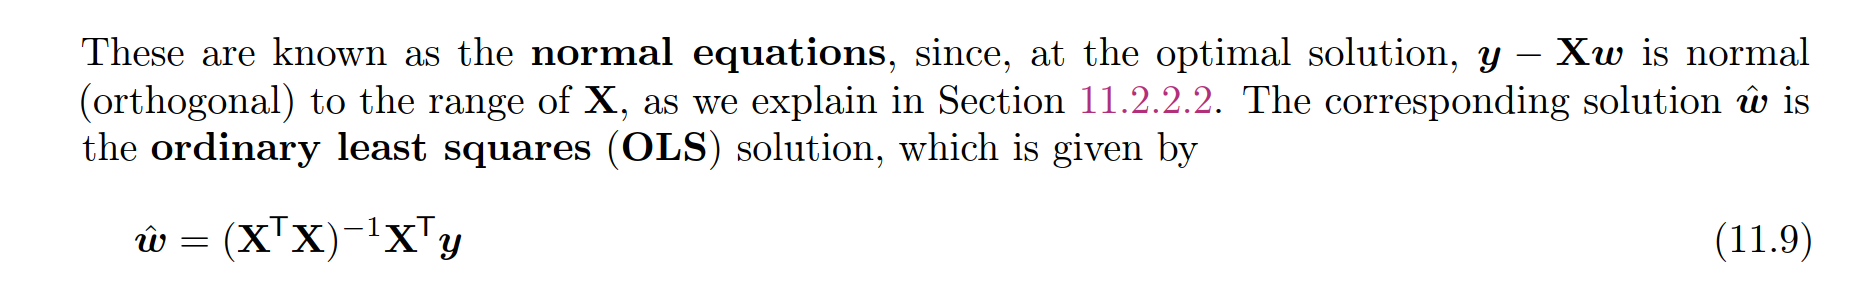

In [10]:
X = jnp.array([[1, 0.5], [-1, 1]])
y = jnp.array([1, 0])


theta_OLS = jnp.linalg.inv(X.T @ X) @ X.T @ y
print("theta_OLS:", theta_OLS)



zeroes_ols = jnp.zeros((X.shape[1], 1))
print("zeroes_ols:", zeroes_ols)

theta_OLS: [0.6666667 0.6666667]
zeroes_ols: [[0.]
 [0.]]


In [11]:
normal_pdf = lambda x, mu, sigma: (1 / (sigma * jnp.sqrt(2 * np.pi))) * jnp.exp(-0.5 * ((x - mu) / sigma) ** 2)

multivarate_normal_pdf = lambda x, mu, sigma: (1 / (jnp.linalg.det(sigma) * jnp.sqrt(2 * np.pi) ** len(mu))) * jnp.exp(-0.5 * ((x - mu).T @ jnp.linalg.inv(sigma) @ (x - mu)))


mu = jnp.array([1, 1])

theta = jnp.array([0, 0])
sigma = 1
tau = 1

sum_of_two_normals = 0.5 *  multivarate_normal_pdf(theta, -mu, sigma * np.eye(2)) + 0.5*  multivarate_normal_pdf(theta, mu, sigma * np.eye(2))

print("sum_of_two_normals:", sum_of_two_normals)

sum_of_two_normals: 0.05854983


In [12]:
C = tau * X @ X.T + sigma * np.eye(X.shape[0])

In [21]:
from scipy.stats import multivariate_normal as mvn

#prior_terms = 0.5 * multivarate_normal_pdf(theta, mean=-mu, cov=tau * np.eye(2)) + 0.5 * multivarate_normal_pdf(theta, mean=mu, cov=tau * np.eye(2))
prior_terms = 0.5 * mvn.pdf(theta, mean=-mu, cov=tau * np.eye(2)) + 0.5 * mvn.pdf(theta, mean=mu, cov=tau * np.eye(2))
print(f"p(theta): {prior_terms:.2f}")

p(theta): 0.06


In [23]:
#marginal = 0.5 * multivarate_normal_pdf(y, -X @ mu, C) + 0.5 * multivarate_normal_pdf(y, X @ mu , C)
#print(f"p(y): {marginal:.2f}")
marginal = 0.5 * mvn.pdf(y, mean=-X @ mu, cov=C) + 0.5 * mvn.pdf(y, mean=X @ mu, cov=C)
print(f"p(y) = {marginal:.2f}")

p(y) = 0.04


In [27]:
likelihood = mvn.pdf(y, mean=X @ theta, cov=sigma * np.eye(2))

print(f"p(y|theta): {likelihood:.2f}")

p(y|theta): 0.10


In [28]:
posterior = prior_terms * likelihood / marginal
print(f"p(theta|y): {posterior:.2f}")

p(theta|y): 0.15
